# Aprendizado supervisionado

## Alunos

- João Vitor Vendemiato Fatoretto - 199944
- Natan Beltrão da Cunha Pevidor Carvalho - 184972

## Resumo


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parte 1 - Tarefa de regressão
O objetivo da primeira parte do projeto é fazer uma previsão da trajetória de um chute ao gol em um jogo de futebol de robôs para verificar se o chute vai ou não se concretizar em um gol, dado que também há um robô goleiro defendendo. Usaremos dois datasets que representam dois chutes diferentes, os quais possuem 3 colunas, que representam os eixos x, y e z, e 20 linhas, sendo que cada uma representa uma fração de 1/60 de um segundo. A ideia é usar o algoritmo Gradient Descendant fazendo tanto uma regressão linear, quanto uma polinomial e comparar os dados obtidos entre si, considerando ambos os modelos e também os dois chutes diferentes.

Abaixo, plotamos os pontos de ambos os datasets em um gráfico 3D para facilitar a visualização dos dados e seu entendimento:

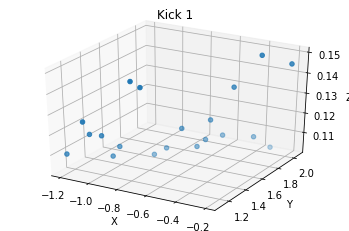

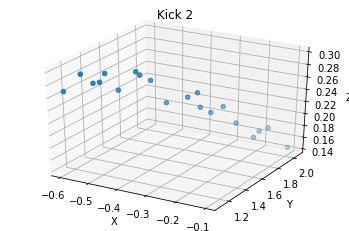

In [2]:
data_kick_1 = np.loadtxt('kick1.dat')
data_kick_2 = np.loadtxt('kick2.dat')

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_kick_1[:,0], data_kick_1[:,1], data_kick_1[:,2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Kick 1')
plt.show()

ax = plt.axes(projection='3d')

ax.scatter(data_kick_2[:,0], data_kick_2[:,1], data_kick_2[:,2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('Kick 2')
plt.show()

## Gradient Descendant
A regressão linear e polinomia foram feitas, seguindo as instruções do projeto, com o algoritmo _Gradient Descendant_, o qual, dado uma função de custo definida, procura o ponto de mínimo da função por meio de uma valiação do seu gradiente. Como os movimentos no eixo X, Y e Z são independentes entre si, decidimos utilizar uma função de custo para cada eixo, a qual depende apenas de uma marcação de tempo T que incluímos - cada marcação representa uma fração de 1/60 segundos, como descrito no enunciado.

Sendo assim, para o caso linear, definimos as seguintes funções de custo:
- X = a1T + b1;
- Y = a2T + b2;
- Z = a3T + b3;

Já para o caso polinomial:
- X = a1T² + b1T + c1;
- Y = a2T² + b2T + c2;
- Z = a3T² + b3T + c3;

Para o caso polinomial, foi necessário inferir o grau do polinômio da função de custo. Com base tanto na distribuição dos dados no eixo Z, que parece uma parábola, quanto na física, já que no eixo Z atua apenas a aceleração constante da gravidade (descrevendo um movimento uniformemente variado, cujo gráfico característico é uma parábola), escolhemos um polinômio de grau 2.

Outra forma não abordada que poderíamos ter feito para a escolha do grau desse polinômio é criar uma função _Gradient Descendant_ diferente para cada grau de polinômio (ou uma que, de algum modo, funcionasse para todos os graus, calculando a derivada de cada um automaticamente) e, para cada grau, avaliar o quão bem o polinômio gerado descreve os dados de cada chute por meio da função _adjusted R²_, definida posteriormente nesse relatório. Optamos pela inferência do grau para não aumentar a complexidade do relatório e do trabalho de forma desnecessária, já que a inferência supriu bem para o caso deste relatório.

### Preparação dos Dados
Com o modelo escolhido, primeiro passo foi separar os dados de cada eixo em variáveis diferentes e criar um vetor de marcações de tempo, considerando que cada marcação tem a fração de 1/60 segundos, de modo que possamos trabalhar cada um dos eixos separadamente pelo algoritmo do Gradiente Descendant.

In [3]:
t = 1/60
T = np.array([t, t*2, t*3, t*4, t*5, t*6, t*7, t*8, t*9, t*10, t*11, t*12, t*13, t*14, t*15, t*16, t*17, t*18, t*19, t*20])

X1 = data_kick_1[:, 0]
Y1 = data_kick_1[:, 1]
Z1 = data_kick_1[:, 2]

X2 = data_kick_2[:, 0]
Y2 = data_kick_2[:, 1]
Z2 = data_kick_2[:, 2]

Separando os dados dessa forma, com suas respectivas marções de tempo, temos os seguintes gráficos para o chute 1:

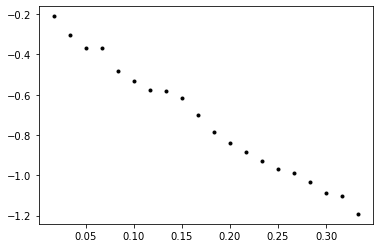

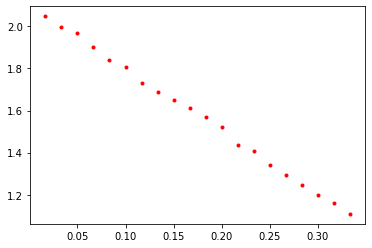

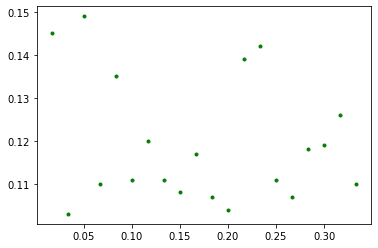

In [4]:
plt.plot(T, X1, '.', color='black')
plt.show()

plt.plot(T, Y1, '.', color='red')
plt.show()

plt.plot(T, Z1, '.', color='green')
plt.show()

E para o chute 2:

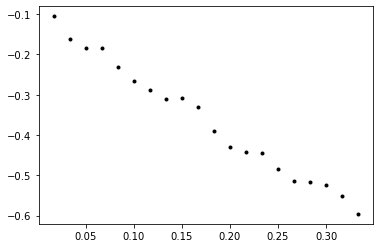

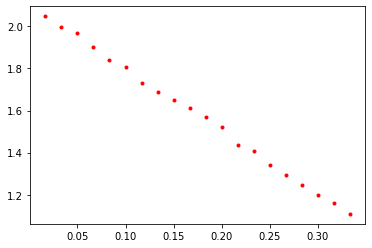

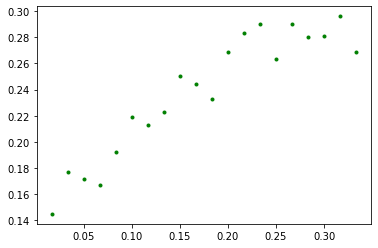

In [169]:
plt.plot(T, X2, '.', color='black')
plt.show()

plt.plot(T, Y2, '.', color='red')
plt.show()

plt.plot(T, Z2, '.', color='green')
plt.show()

### O algoritmo
Com o grau da função de custo para a regressão polinomial definida, optamos por criar duas funções para o algoritmo _Gradient Descendant_, sendo a primeira para a regressão linear e a segunda para a regressão polinomial. As funções foram projetadas para rodar para cada eixo de forma independente, como explicitado anteriormente, com as respectivas derivadas parciais para cada coeficiente em cada um dos casos na atualização dos passos. As funções recebem coeficientes iniciais a, b e c para começar o ajuste, uma learning rate L, o número de épocas epochs, um vetor W com as posições do eixo em questão e um vetor T com as marcações de tempo. Por fim, a função retornar os coeficientes da função resultante.

In [6]:
def gradientDescendantG1(a, b, L, epochs, W, T):
    n = float(len(W))
    
    for i in range(epochs):
        temp_a = (1/n) * sum((b + (a*T) - W) * T) # angular
        temp_b = (1/n) * sum(b + (a*T) - W) # linear
        a = a - (L * temp_a)
        b = b - (L * temp_b)
        
    return a, b

def gradientDescendantG2(a, b, c, L, epochs, W, T):
    n = float(len(W))
    
    for i in range(epochs):
        temp_a = (1/n) * sum((c + (b*T) + (a*(T**2)) - W) * (T**2)) # ax²
        temp_b = (1/n) * sum((c + (b*T) + (a*(T**2)) - W) * T) # bx
        temp_c = (1/n) * sum(c + (b*T) + (a*(T**2)) - W) # c
        a = a - (L * temp_a)
        b = b - (L * temp_b)
        c = c - (L * temp_c)
        
    return a, b, c

### Função de plot
As funções de plot, diferentes para o caso linear e polinomial, simplesmente plotam os pontos de um determinado eixo e a função 

In [7]:
def plotRegressionLineG1(a, b, W, T):
    pred_W = a*T + b
    plt.scatter(T, W) 
    plt.plot(T, pred_W, color='red')  # regression line
    plt.show()

def fG2(x, a, b, c):
    return a*x**2 + b*x + c
    
def plotRegressionLineG2(a, b, c, W, T):
    x_vals = np.linspace(-0, 0.4, 2000)
    y_vals = np.array([fG2(x, a, b, c) for x in x_vals])
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(x_vals, y_vals)
    
    plt.scatter(T, W)
    plt.show()

## Avaliando o "kick1"
...

-2.9731090562644886 -0.2074064920109118


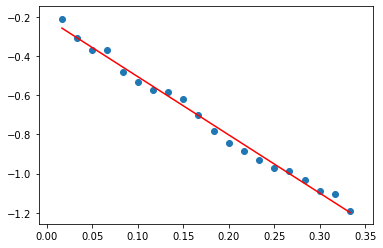

-2.992589870876151 2.1003525666662335


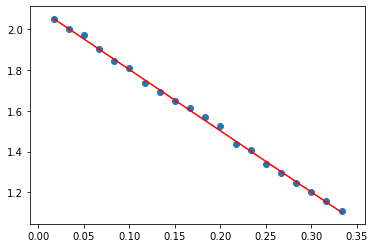

-0.029587575089450858 0.12477781549995737


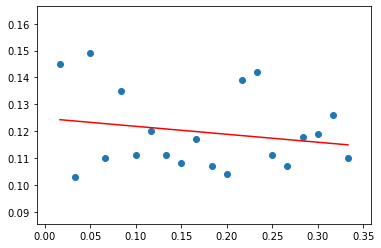

In [8]:
a1, b1 = gradientDescendantG1(0, 0, 0.1, 10000, X1, T)
print(a1, b1)
plotRegressionLineG1(a1, b1, X1, T)

a2, b2 = gradientDescendantG1(0, 0, 0.1, 10000, Y1, T)
print(a2, b2)
plotRegressionLineG1(a2, b2, Y1, T)

a3, b3 = gradientDescendantG1(0, 0, 0.1, 10000, Z1, T)
print(a3, b3)
plotRegressionLineG1(a3, b3, Z1, T)

X1_linear_coefficients = [(a1, b1)]
Y1_linear_coefficients = [(a2, b2)]
Z1_linear_coefficients = [(a3, b3)]

Escrever sobre a parte polinomial do chute 1

0.27037003113768476 -3.0647408397081057 -0.20214950358209152


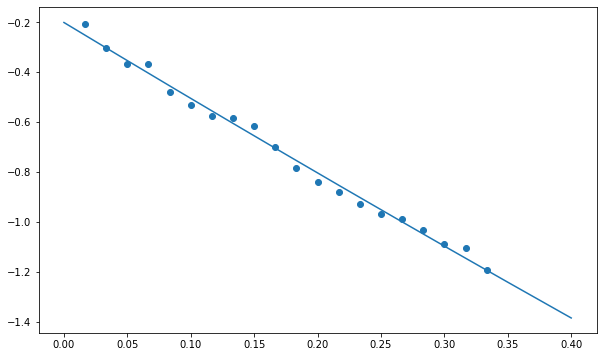

-0.5041712716695774 -2.815215271289814 2.089408746428297


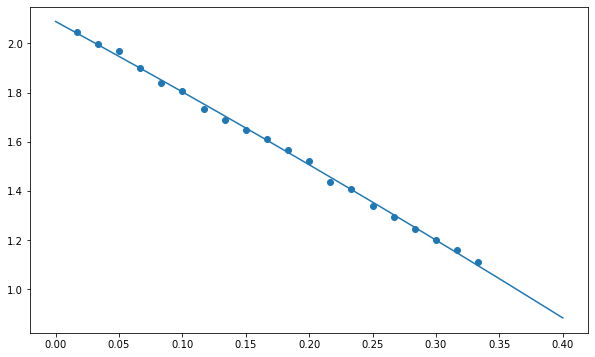

0.16585562011151417 -0.08714536395476803 0.1282389678302498


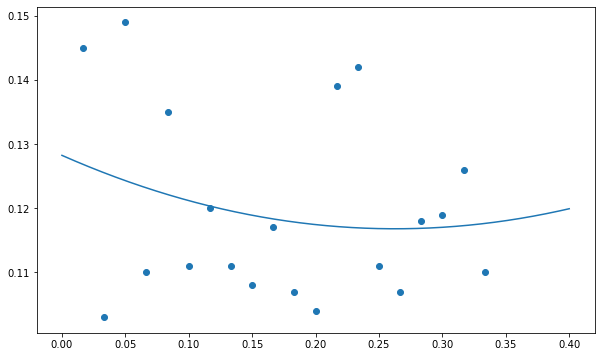

In [9]:
a1, b1, c1 = gradientDescendantG2(0, 0, 0, 1, 10000, X1, T)
print(a1, b1, c1)
plotRegressionLineG2(a1, b1, c1, X1, T)

a2, b2, c2 = gradientDescendantG2(0, 0, 0, 1, 10000, Y1, T)
print(a2, b2, c2)
plotRegressionLineG2(a2, b2, c2, Y1, T)

a3, b3, c3 = gradientDescendantG2(0, 0, 0, 1, 10000, Z1, T)
print(a3, b3, c3)
plotRegressionLineG2(a3, b3, c3, Z1, T)

X1_polynomial_coefficients = [(a1, b1, c1)]
Y1_polynomial_coefficients = [(a2, b2, c2)]
Z1_polynomial_coefficients = [(a3, b3, c3)]

## Avaliando o "kick2"
...

-1.4718496293177934 -0.10562660034256531


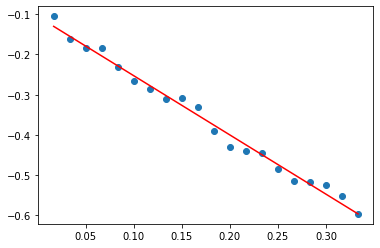

-2.992589870876151 2.1003525666662335


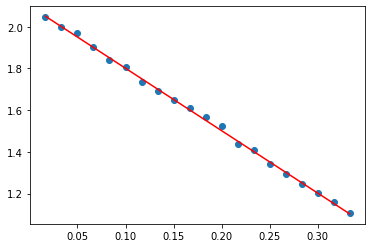

0.4439483848570019 0.16010911430741562


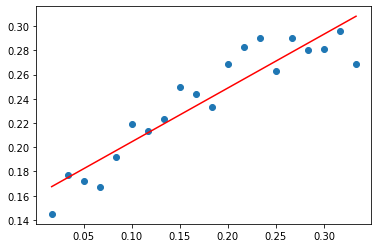

In [10]:
a1, b1 = gradientDescendantG1(0, 0, 0.1, 10000, X2, T)
print(a1, b1)
plotRegressionLineG1(a1, b1, X2, T)

a2, b2 = gradientDescendantG1(0, 0, 0.1, 10000, Y2, T)
print(a2, b2)
plotRegressionLineG1(a2, b2, Y2, T)

a3, b3 = gradientDescendantG1(0, 0, 0.1, 10000, Z2, T)
print(a3, b3)
plotRegressionLineG1(a3, b3, Z2, T)

0.12295457746236045 -1.5134303486422294 -0.10325171863525705


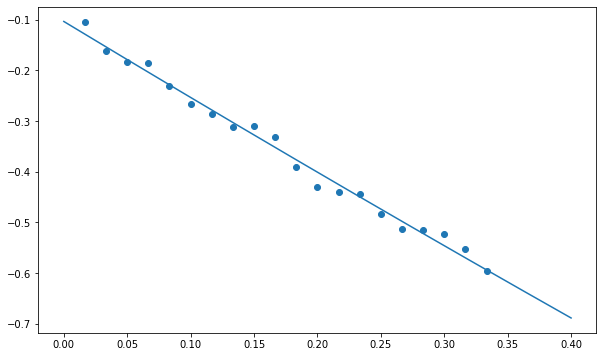

-0.5041712716695774 -2.815215271289814 2.089408746428297


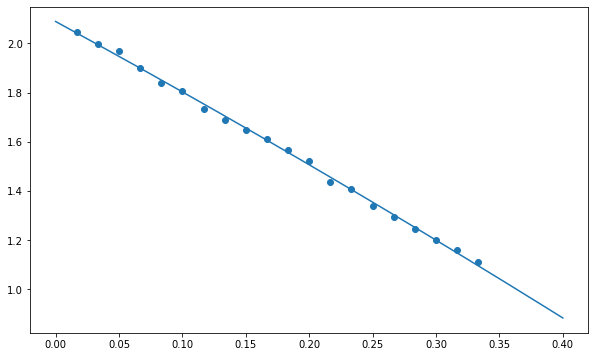

-0.6019461552768476 0.6526107421162934 0.1475885330746459


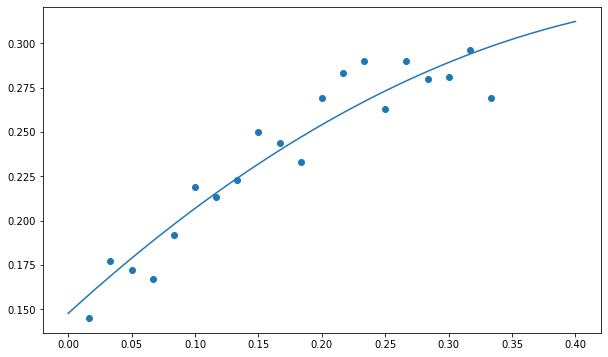

In [11]:
a1, b1, c1 = gradientDescendantG2(0, 0, 0, 1, 10000, X2, T)
print(a1, b1, c1)
plotRegressionLineG2(a1, b1, c1, X2, T)

a2, b2, c2 = gradientDescendantG2(0, 0, 0, 1, 10000, Y2, T)
print(a2, b2, c2)
plotRegressionLineG2(a2, b2, c2, Y2, T)

a3, b3, c3 = gradientDescendantG2(0, 0, 0, 1, 10000, Z2, T)
print(a3, b3, c3)
plotRegressionLineG2(a3, b3, c3, Z2, T)

## Avaliando a Learning Rate
### Variando a Learning Rate para um valor maior
Para mais...

3.4735054973877596e+259 1.967077417704877e+260


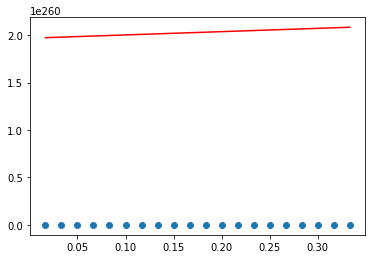

-7.454975581959761e+259 -4.221819751787567e+260


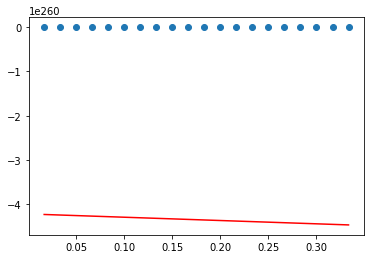

-5.669938155801945e+258 -3.210936995622716e+259


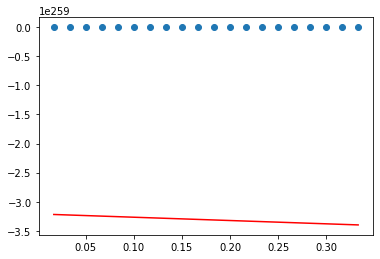

In [12]:
a1, b1 = gradientDescendantG1(0, 0, 2, 10000, X1, T)
print(a1, b1)
plotRegressionLineG1(a1, b1, X1, T)

a2, b2 = gradientDescendantG1(0, 0, 2, 10000, Y1, T)
print(a2, b2)
plotRegressionLineG1(a2, b2, Y1, T)

a3, b3 = gradientDescendantG1(0, 0, 2, 10000, Z1, T)
print(a3, b3)
plotRegressionLineG1(a3, b3, Z1, T)

X1_linear_coefficients.append((a1, b1))
Y1_linear_coefficients.append((a2, b2))
Z1_linear_coefficients.append((a3, b3))

1.7892682175851185e+272 7.814295751769176e+272 4.422168310759867e+273


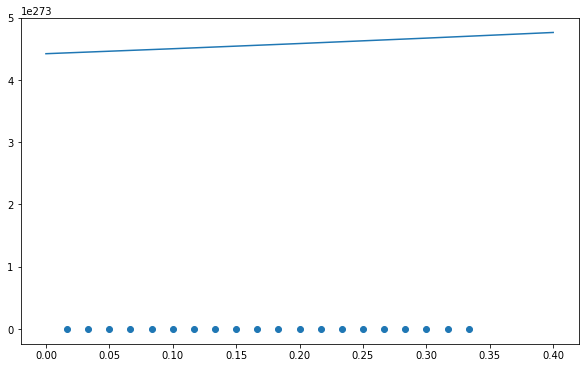

-3.8373548450544256e+272 -1.6758932712844159e+273 -9.484005151470959e+273


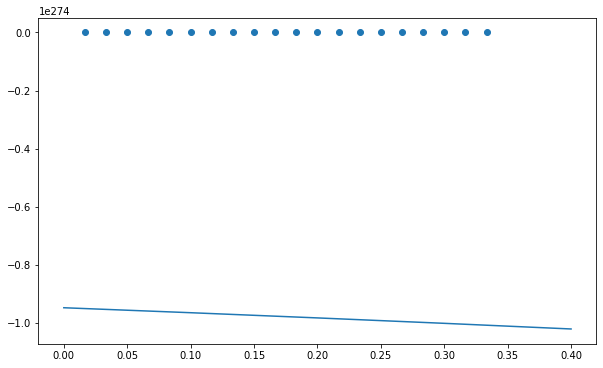

-2.919159471866554e+271 -1.2748885402173278e+272 -7.214689437654799e+272


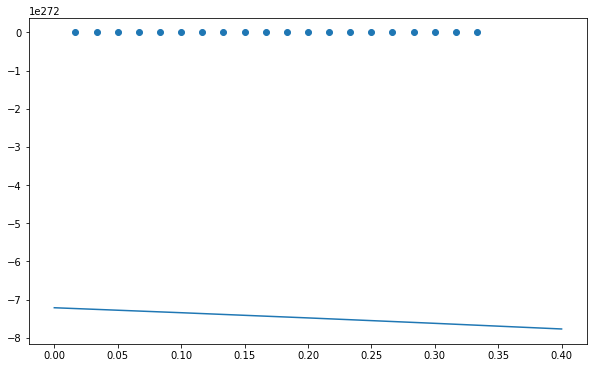

In [13]:
a1, b1, c1 = gradientDescendantG2(0, 0, 0, 2, 10000, X1, T)
print(a1, b1, c1)
plotRegressionLineG2(a1, b1, c1, X1, T)

a2, b2, c2 = gradientDescendantG2(0, 0, 0, 2, 10000, Y1, T)
print(a2, b2, c2)
plotRegressionLineG2(a2, b2, c2, Y1, T)

a3, b3, c3 = gradientDescendantG2(0, 0, 0, 2, 10000, Z1, T)
print(a3, b3, c3)
plotRegressionLineG2(a3, b3, c3, Z1, T)

X1_polynomial_coefficients.append((a1, b1, c1))
Y1_polynomial_coefficients.append((a2, b2, c2))
Z1_polynomial_coefficients.append((a3, b3, c3))

### Variando a Learning Rate para um valor menor
...

-1.810859816706004 -0.4126388375507974


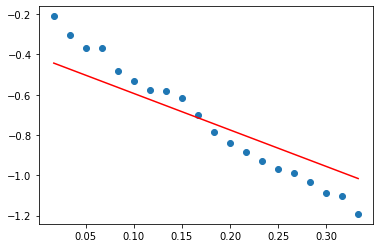

-1.6613398016465522 1.8652777093043855


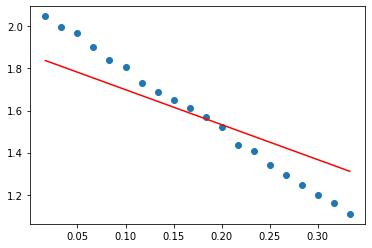

-0.009156146152790097 0.1211699920308749


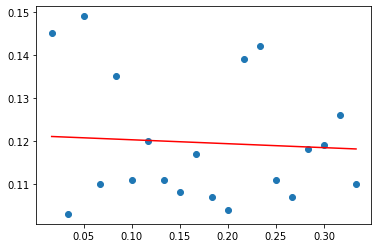

In [14]:
a1, b1 = gradientDescendantG1(0, 0, 0.01, 10000, X1, T)
print(a1, b1)
plotRegressionLineG1(a1, b1, X1, T)

a2, b2 = gradientDescendantG1(0, 0, 0.01, 10000, Y1, T)
print(a2, b2)
plotRegressionLineG1(a2, b2, Y1, T)

a3, b3 = gradientDescendantG1(0, 0, 0.01, 10000, Z1, T)
print(a3, b3)
plotRegressionLineG1(a3, b3, Z1, T)

-0.5819262055512998 -1.7273743483911597 -0.4039869302956792


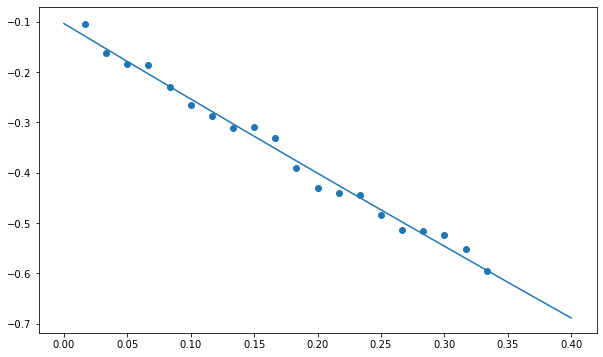

-0.5914930822196385 -1.5829126395645614 1.8751849898015944


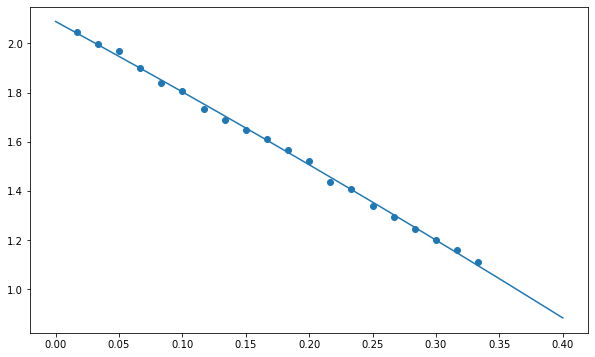

-0.0031677567586449996 -0.008999451553073837 0.12126892297044585


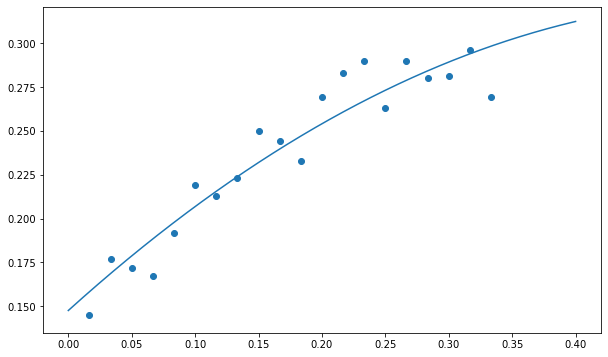

In [15]:
a1, b1, c1 = gradientDescendantG2(0, 0, 0, 0.01, 10000, X1, T)
print(a1, b1, c1)
plotRegressionLineG2(a1, b1, c1, X1, T)

a2, b2, c2 = gradientDescendantG2(0, 0, 0, 0.01, 10000, Y1, T)
print(a2, b2, c2)
plotRegressionLineG2(a2, b2, c2, Y1, T)

a3, b3, c3 = gradientDescendantG2(0, 0, 0, 0.01, 10000, Z1, T)
print(a3, b3, c3)
plotRegressionLineG2(a3, b3, c3, Z1, T)

Agora vamos analisar, dentre os modelos treinados acima, quais explicam melhor o chute 1. Para isso, vamos usar as métricas **R²** e **adjusted R²**. A primeira permite uma comparação objetiva entre quanto cada modelo representa os dados, onde 1 indica uma representação totalmente precisa e -1 indica o inverso. Já a segunda adiciona uma penalização conforme o grau do modelo utilizado de forma a prevenir *overfitting*.

In [19]:
def r_squared(y_expected, y_prediction):
    avg = np.average(y_expected)
    difference_from_average = y_expected - avg
    difference_from_prediction = y_expected - y_prediction
    total_sum = np.sum(difference_from_average ** 2)
    residual_sum = np.sum(difference_from_prediction ** 2)
    return (1 - (residual_sum / total_sum))

def adjusted_r_squared(y_expected, y_prediction, degree):
    r2 = r_squared(y_expected, y_prediction)
    n = y_expected.size
    return 1 - ((1 - r2)*(n - 1))/(n - degree - 1)

X1_r_squared = []
X1_adjusted_r_squared = []
Y1_r_squared = []
Y1_adjusted_r_squared = []
Z1_r_squared = []
Z1_adjusted_r_squared = []

for i in range(3):
    a, b = X1_linear_coefficients[i]
    X1_values = a*T + b
    X1_r_squared.append(r_squared(X1, X1_values))
    X1_adjusted_r_squared.append(adjusted_r_squared(X1, X1_values, 1))
    a, b = Y1_linear_coefficients[i]
    Y1_values = a*T + b
    Y1_r_squared.append(r_squared(Y1, Y1_values))
    Y1_adjusted_r_squared.append(adjusted_r_squared(Y1, Y1_values, 1))
    a, b = Z1_linear_coefficients[i]
    Z1_values = a*T + b
    Z1_r_squared.append(r_squared(Z1, Z1_values))
    Z1_adjusted_r_squared.append(adjusted_r_squared(Z1, Z1_values, 1))

for i in range(3):
    a, b, c = X1_polynomial_coefficients[i]
    X1_values = c + (b*T) + (a*(T**2))
    X1_r_squared.append(r_squared(X1, X1_values))
    X1_adjusted_r_squared.append(adjusted_r_squared(X1, X1_values, 1))
    a, b, c = Y1_polynomial_coefficients[i]
    Y1_values = c + (b*T) + (a*(T**2))
    Y1_r_squared.append(r_squared(Y1, Y1_values))
    Y1_adjusted_r_squared.append(adjusted_r_squared(Y1, Y1_values, 1))
    a, b, c = Z1_polynomial_coefficients[i]
    Z1_values = c + (b*T) + (a*(T**2))
    Z1_r_squared.append(r_squared(Z1, Z1_values))
    Z1_adjusted_r_squared.append(adjusted_r_squared(Z1, Z1_values, 1))

max_X1_r_squared = max(X1_r_squared)
max_X1_r_squared_index = X1_r_squared.index(max_X1_r_squared)
max_X1_adjusted_r_squared = max(X1_adjusted_r_squared)
max_X1_adjusted_r_squared_index = X1_adjusted_r_squared.index(max_X1_adjusted_r_squared)

print("Melhor R²:", max_X1_r_squared, "índice:", max_X1_r_squared_index)
print("Melhor adjusted R²:", max_X1_adjusted_r_squared, "índice:", max_X1_adjusted_r_squared_index)

Melhor R²: 0.9919945970414474 índice: 3
Melhor adjusted R²: 0.9915498524326389 índice: 3


<ipython-input-19-6f87865a2295>:6: RuntimeWarning: overflow encountered in square
  residual_sum = np.sum(difference_from_prediction ** 2)
